In [ ]:
import memex as x
x.random_scan()

The CDF of a Weibull distribution is $1-e^{-(x/\lambda)^k}$ if $k$ > 1
or 0 otherwise.

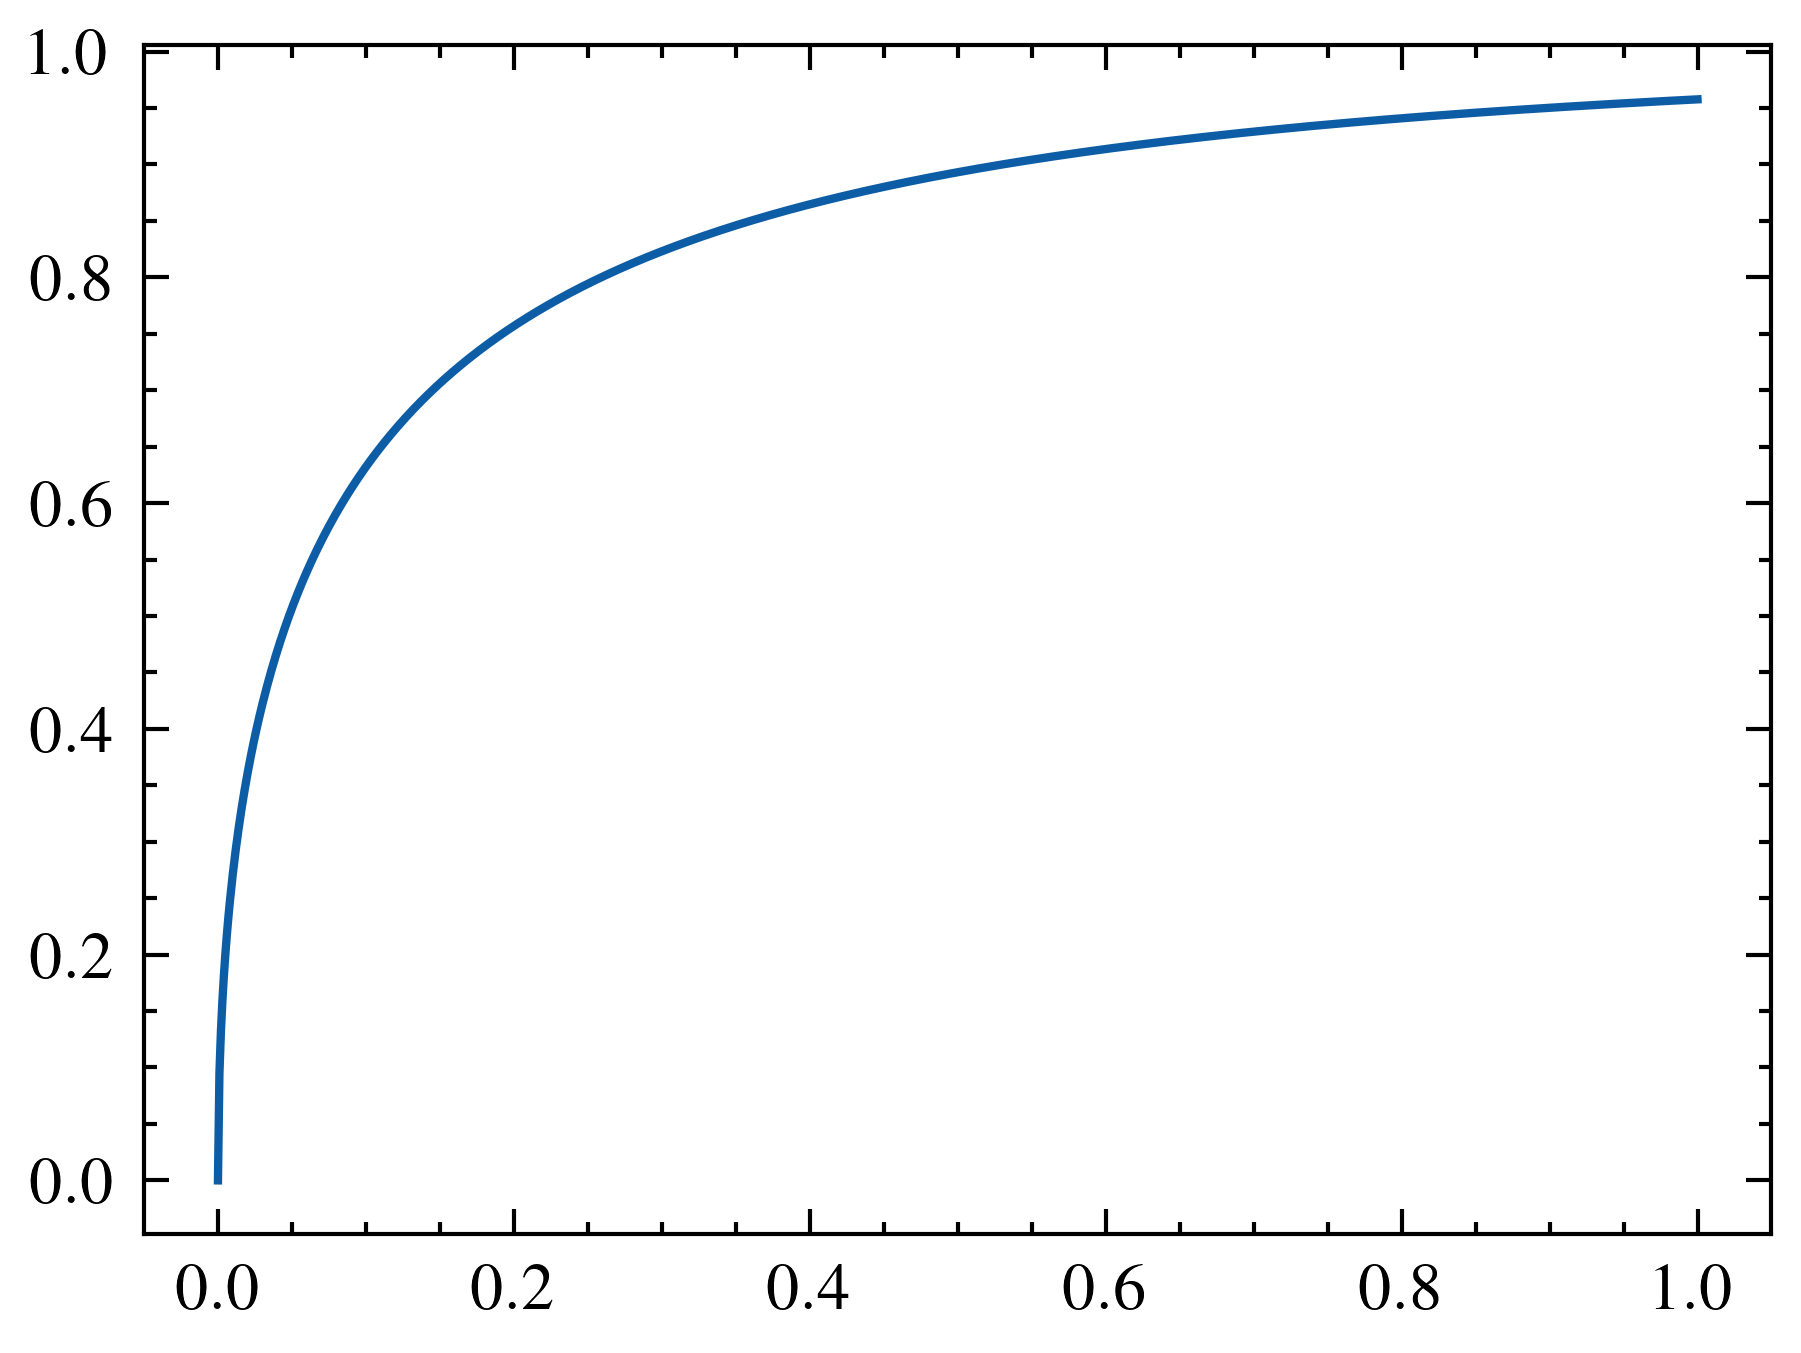

In [96]:
import matplotlib.pyplot as plt
plt.style.use(['ieee','science'])
import numpy as np
def weibull(x,scale=1,shape=1) :
    x = np.array(x)
    y = 1-np.exp(-np.power(x/scale,shape))
    return y
x = np.linspace(0,1,1000)
y = weibull(x,0.1,0.5)
plt.plot(x,y)

<IPython.core.display.Javascript object>


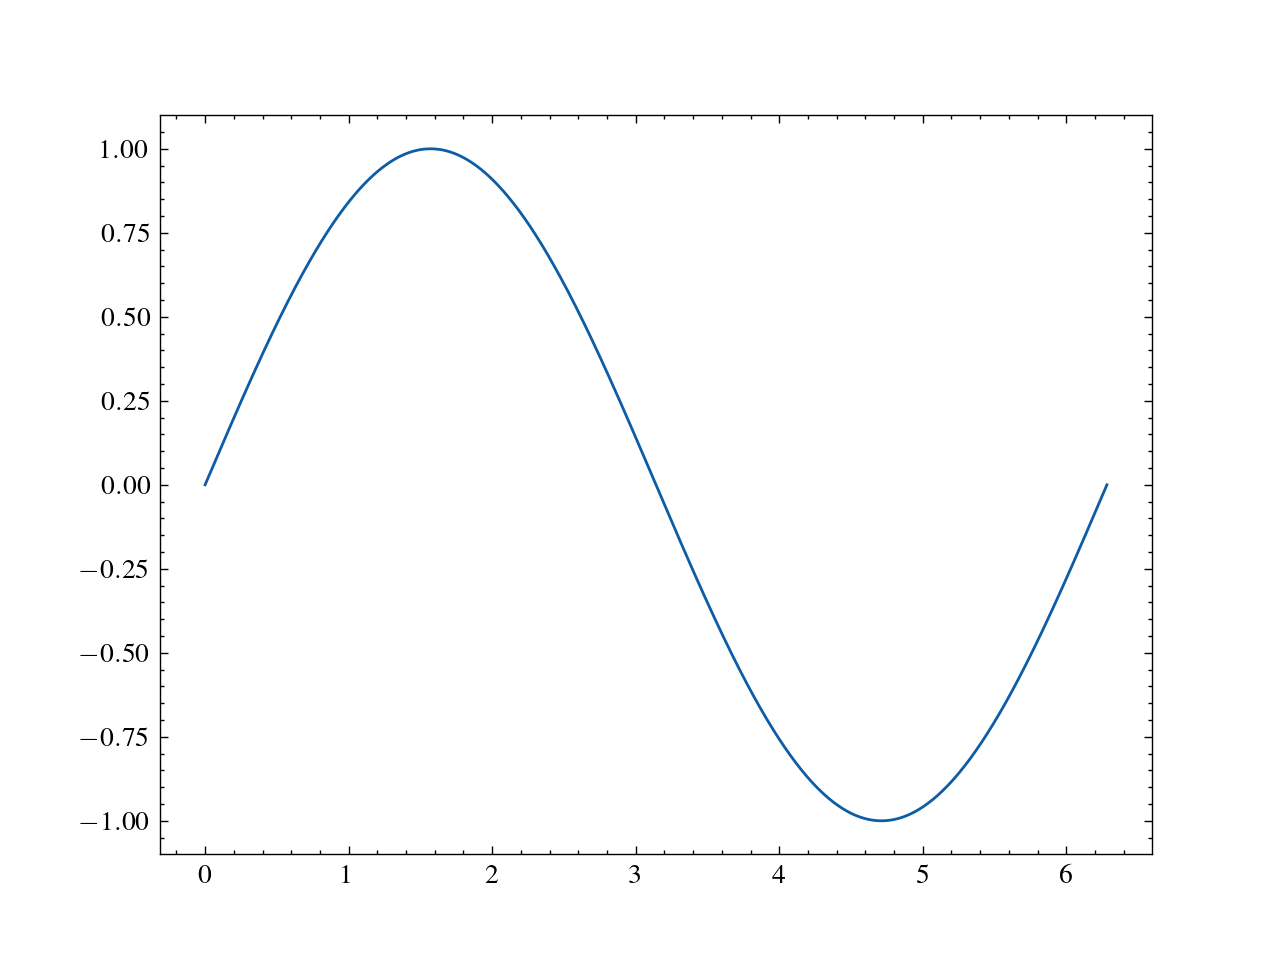

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [101]:
%matplotlib notebook
import ipywidgets as w
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi,1000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

w.interact(update);

In [17]:
%matplotlib notebook

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


<IPython.core.display.Javascript object>


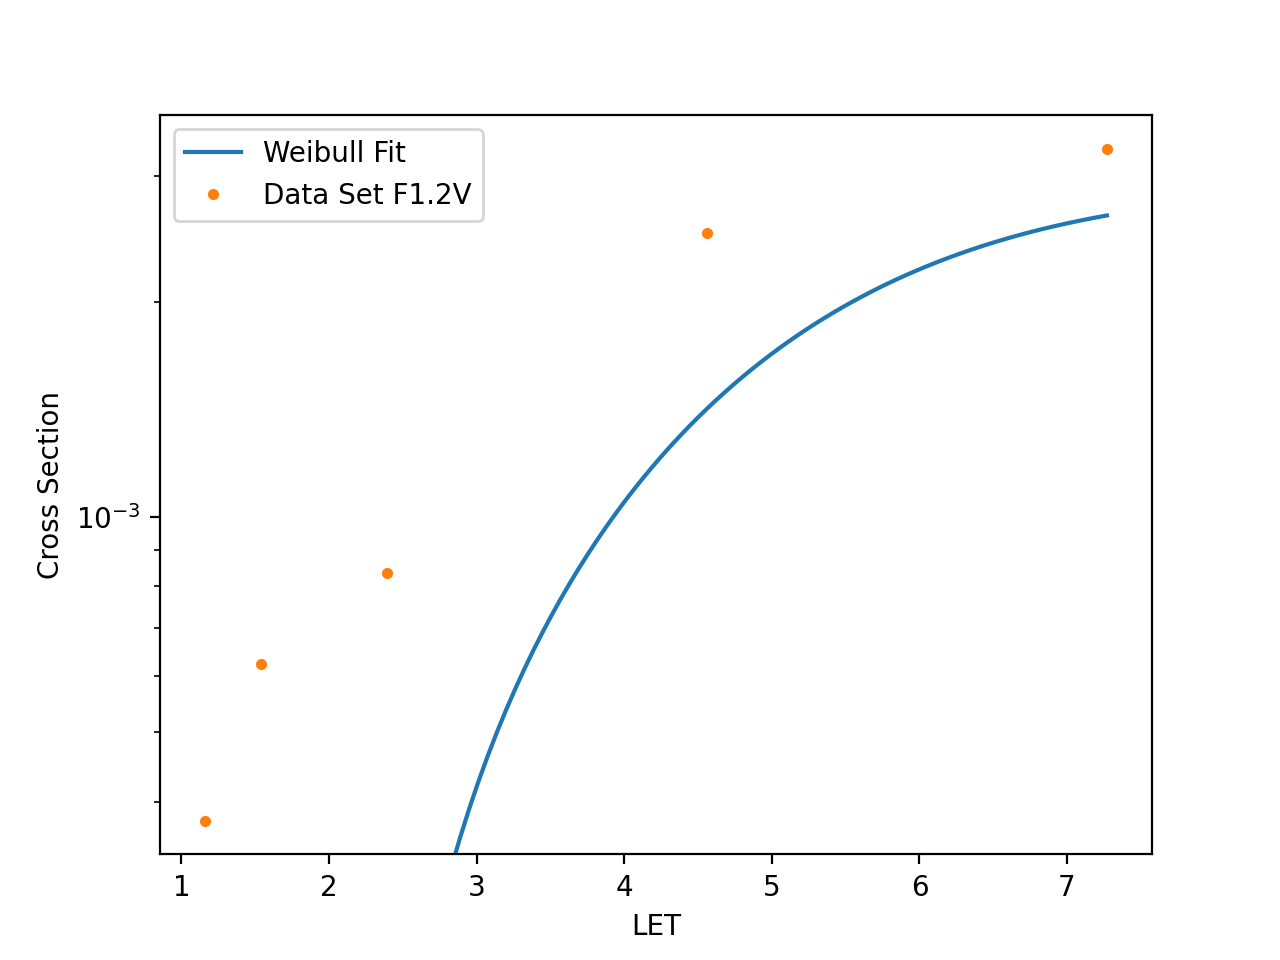

interactive(children=(FloatSlider(value=5.0, description='scale', max=10.0), FloatSlider(value=2.5, descriptio…

In [72]:
group = 'F'
bias = '1.2V'

def get_group(group,bias=['0.6V','0.9V','1.2V','1.5V']) :
    data = pd.read_csv('data/sram/seu_sept2021/xs.csv')
    data = data.set_index(['Group','Bias','LET'])
    df = pd.DataFrame()
    for b in bias :
        x = data.xs((group,b)).index
        y = data.xs((group,b))['XS']
        err = data.xs((group,b))['Error']
        if df.empty :
            df = pd.DataFrame(y.rename(b))
        else :
            df = df.join(y.rename(b))
    return df

import numpy as np
def weibull(x,scale=1,shape=1) :
    x = np.array(x)
    y = 1-np.exp(-np.power(x/scale,shape))
    return y

import pandas as pd
y = get_group(group)
y = y.stack().xs(bias,level=1)
x = y.index

import matplotlib.pyplot as plt
import ipywidgets as w
x_fit = np.linspace(x[0],x[-1],100)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
y_fit = weibull(x_fit,1,1) * max(y)
fit, = ax.plot(x_fit,y_fit,'-',label = 'Weibull Fit')
dots, = ax.plot(x,y,'.',label = 'Data Set ' + group + bias)
plt.legend()
plt.semilogy()
plt.xlabel('LET')
plt.ylabel('Cross Section')

def update(scale=(0.0,10.0),shape=(0.0,5.0),x_offset=(-10.0,10.0)) :
    y_fit = weibull(x_fit - x_offset,scale,shape) * max(y) - min(y)
    fit.set_ydata(y_fit)
    dots.set_ydata(y)
    fig.canvas.draw_idle()

w.interact(update);

In [ ]:
a = widgets.IntSlider(value=5, min=0, max=10)

def f1(scale=1.0,shape=1.0):
    y_fit = weibull(x_fit,scale,shape)
    line.set_ydata(y,y_fit)
    fig.canvas.draw_idle()

def f2(a):
    display(a * 2)

out1 = widgets.interactive_output(f1, {'a': a})
out2 = widgets.interactive_output(f2, {'a': a})

display(a)
display(out1)
display(out2)